In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline
# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [2]:
!pip install pami
import PAMI


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=42)
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [6]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
len(twenty_train.data)

2257

In [9]:
len(twenty_train.filenames)

2257

In [10]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [11]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [12]:
twenty_train.target[0]

1

In [13]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [14]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


《Exercise 1》

In [15]:
#print out the text data for the first three samples.
for text in twenty_train.data[:3]:
    print(text)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [16]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [17]:
len(X)

2257

In [18]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [19]:
for t in X["text"][:2]:
    print(t)


From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [20]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [21]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [22]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

In [23]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [24]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [25]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

Exercise 2

In [341]:
X.sample(n=3)

text  category  \
1013  From: banschbach@vms.ocom.okstate.edu Subject:...         2   
1434  From: amigan@cup.portal.com (Mike - Medwid) Su...         2   
1660  From: kilty@ucrengr (kathleen richards) Subjec...         2   

     category_name                                           unigrams  \
1013       sci.med  [From, :, banschbach, @, vms.ocom.okstate.edu,...   
1434       sci.med  [From, :, amigan, @, cup.portal.com, (, Mike, ...   
1660       sci.med  [From, :, kilty, @, ucrengr, (, kathleen, rich...   

                                         tokenized_text  bin_category  
1013  {Nntp-Posting-Host:, is:, inhibitor, question,...  [0, 0, 1, 0]  
1434  {ProStep, -, question, Organization:, amigan@c...  [0, 0, 1, 0]  
1660  {Nntp-Posting-Host:, bug!~, 12, Re:, Jeff,, yo...  [0, 0, 1, 0]

Exercise 3

In [29]:
print(X[X['category_name']=='sci.med'].iloc[::10][0:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


In [30]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

Exercise 4

In [36]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [38]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [39]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T -> Transpose

text category
0  dummy_record        1

In [40]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [41]:
len(result_with_series)

2258

In [42]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [43]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
'category': 1
}]

In [44]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [47]:
len(X)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X.dropna(inplace=True)

In [48]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X)

2257

> Exercise 5

In [50]:
import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
{ 'id': 'B' },
{ 'id': 'C', 'missing_example': 'NaN' },
{ 'id': 'D', 'missing_example': 'None' },
{ 'id': 'E', 'missing_example': None },
{ 'id': 'F', 'missing_example': '' }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [51]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [53]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [54]:
sum(X.duplicated())

0

In [55]:
sum(X.duplicated('text'))

0

In [56]:
dummy_duplicate_dict = [{
'text': 'dummy record',
'category': 1,
'category_name': "dummy category"
},
{
'text': 'dummy record',
'category': 1,
'category_name': "dummy category"
}]

In [57]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [58]:
len(X)

2259

In [59]:
sum(X.duplicated())

1

In [60]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [61]:
len(X)

2257

## **5.Data Preprocessing**

In [63]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [64]:
X_sample[0:4]

text  category  \
2171  From: gilham@csl.sri.com (Fred Gilham) Subject...         3   
1648  From: ajs8@kimbark.uchicago.edu (adam jeremy s...         1   
311   From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
1133  From: mcgoy@unicorn.acs.ttu.edu (David McGaugh...         0   

               category_name  
2171  soc.religion.christian  
1648           comp.graphics  
311              alt.atheism  
1133             alt.atheism

**Exerecise 6**

In [78]:
#Notice any changes from the X dataframe to the X_sample dataframe? What are they? 
#Report every change you noticed as #compared to the previous state of X . 
#Feel free to query and look more closely at the dataframe for these changes.
print("The percenteage of label of alt.atheism in X and X_sample:")
print(len(X[X['category_name']=='alt.atheism'])/len(X),len(X_sample[X_sample['category_name']=='alt.atheism'])/len(X_sample))
print("The percenteage of label of comp.graphics in X and X_sample:")
print(len(X[X['category_name']=='comp.graphics'])/len(X),len(X_sample[X_sample['category_name']=='comp.graphics'])/len(X_sample))
print("The percenteage of label of sci.med in X and X_sample:")
print(len(X[X['category_name']=='sci.med'])/len(X),len(X_sample[X_sample['category_name']=='sci.med'])/len(X_sample))
print("The percenteage of label of soc.religion.christian in X and X_sample:")
print(len(X[X['category_name']=='soc.religion.christian'])/len(X),len(X_sample[X_sample['category_name']=='soc.religion.christian'])/len(X_sample))

The percenteage of label of alt.atheism in X and X_sample:
0.21267168808152415 0.208
The percenteage of label of comp.graphics in X and X_sample:
0.25875055383252105 0.261
The percenteage of label of sci.med in X and X_sample:
0.2631812140008861 0.255
The percenteage of label of soc.religion.christian in X and X_sample:
0.2653965440850687 0.276


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
categories


['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

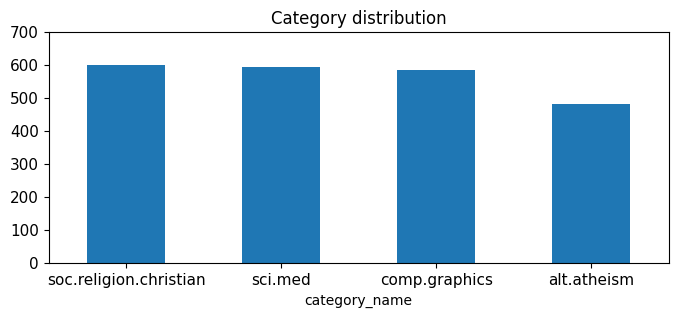

In [81]:
print(X.category_name.value_counts())
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
title = 'Category distribution',
ylim = [0, 700],
rot = 0, fontsize = 11, figsize = (8,3))

category_name
soc.religion.christian    276
comp.graphics             261
sci.med                   255
alt.atheism               208
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

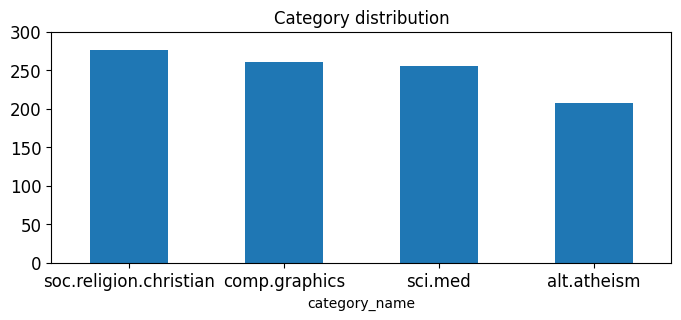

In [82]:
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
title = 'Category distribution',
ylim = [0, 300],
rot = 0, fontsize = 12, figsize = (8,3))


**《Exerecise 7》**

category_name
soc.religion.christian    276
comp.graphics             261
sci.med                   255
alt.atheism               208
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

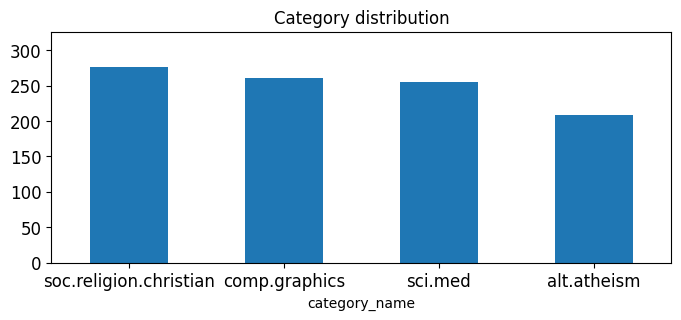

In [83]:
upper_bound = max(X_sample.category_name.value_counts()+50)
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
title = 'Category distribution',
ylim = [0, upper_bound],
rot = 0, fontsize = 12, figsize = (8,3))

**《Exerecise 8》**

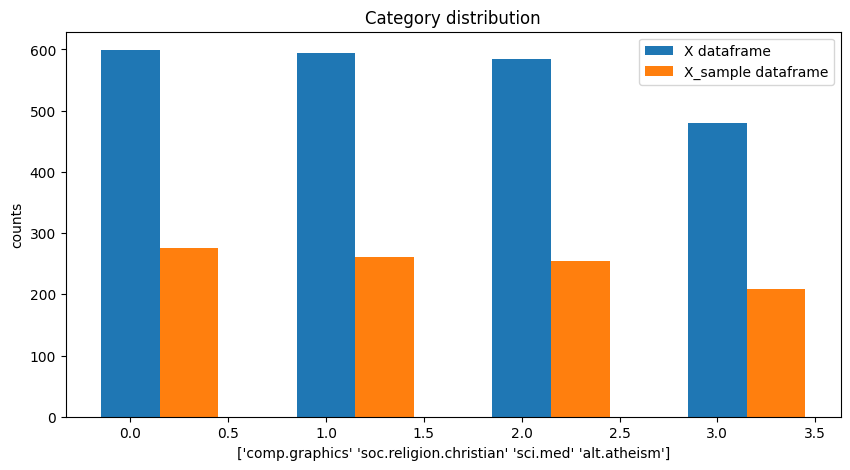

In [91]:
#We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. 
#Below we show you an snapshot of the type of chart we are looking for.
# Numbers of pairs of bars you want
N = 4
# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (X.category_name.value_counts())
# Specify the values of orange bars (height)
orange_bar = (X_sample.category_name.value_counts())

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='X dataframe')
plt.bar(ind + width, orange_bar, width, label='X_sample dataframe')

plt.xlabel(X.category_name.unique())
plt.ylabel('counts')
plt.title('Category distribution')


# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [98]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yuyulu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [99]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [100]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [102]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [103]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])


  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [105]:
count_vect.get_feature_names_out()[14887]

'from'

In [106]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [107]:
count_vect.get_feature_names_out()[8696]

'city'

In [108]:
count_vect.get_feature_names_out()[4017]

'ac'

In [109]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

**《Exerecise 9》**

In [110]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [111]:
X_counts.shape

(2257, 35788)

In [112]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [113]:
X_counts.shape

(2257, 35788)

In [114]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [121]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

**《Exerecise 10》**

In [122]:
count_vect.get_feature_names_out()[38]

'0100'

In [118]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

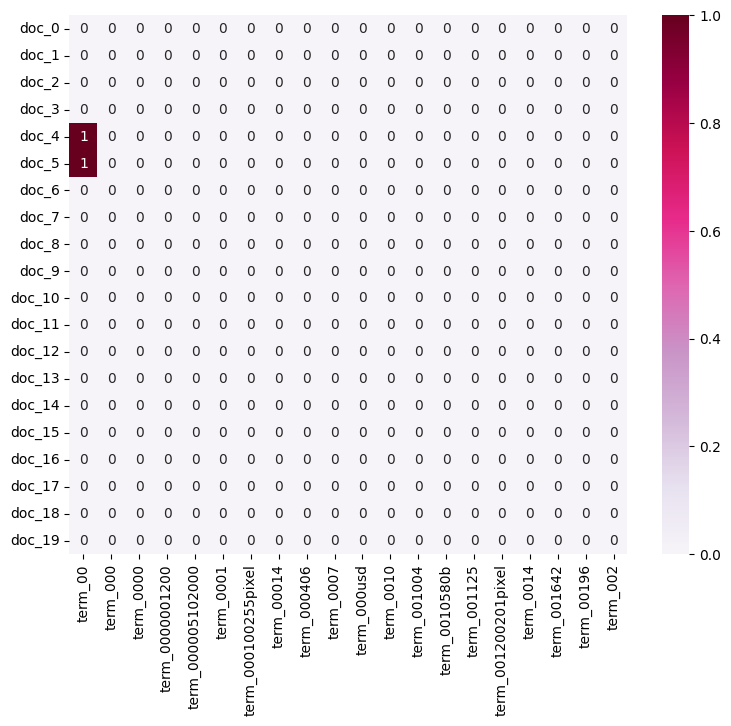

In [119]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
cmap="PuRd",
vmin=0, vmax=1, annot=True)

**《Exerecise 11》**

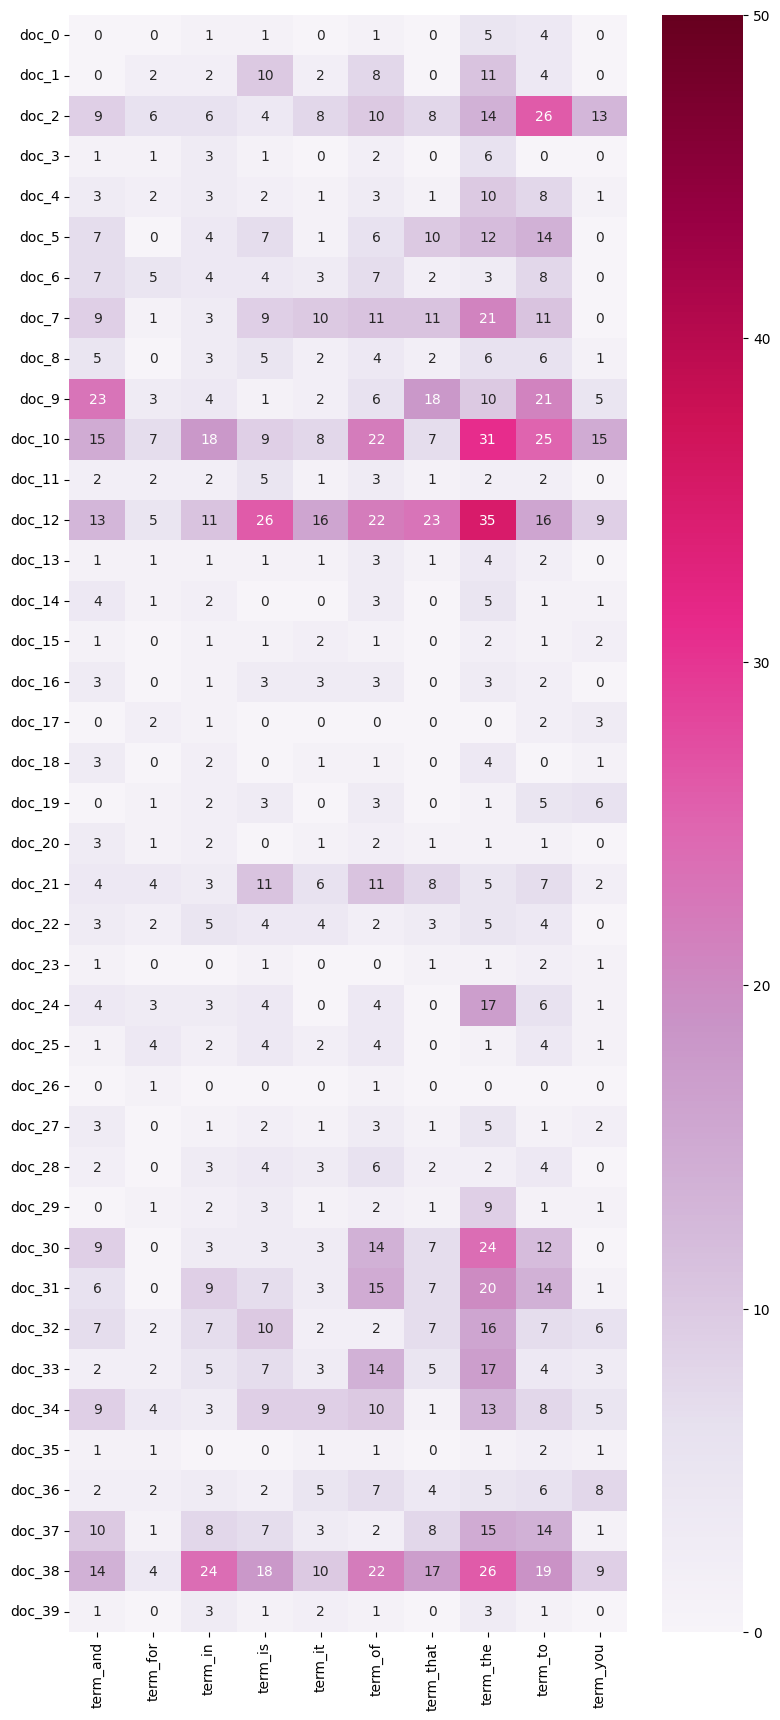

In [138]:
##chose the most common term in TDM, and plot the heatmap.
vectorizer = CountVectorizer(max_features=10)  # Limit to top 50 features for efficiency
term_doc_matrix = vectorizer.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:10]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
plot_z = term_doc_matrix[0:40, 0:10].toarray() #
plot_z
# Display a summary of the term-document matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 21))
ax = sns.heatmap(df_todraw,
cmap="PuRd",
vmin=0, vmax=50, annot=True)


In [140]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [141]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [142]:
term_frequencies[0]

134

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\3453781580.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


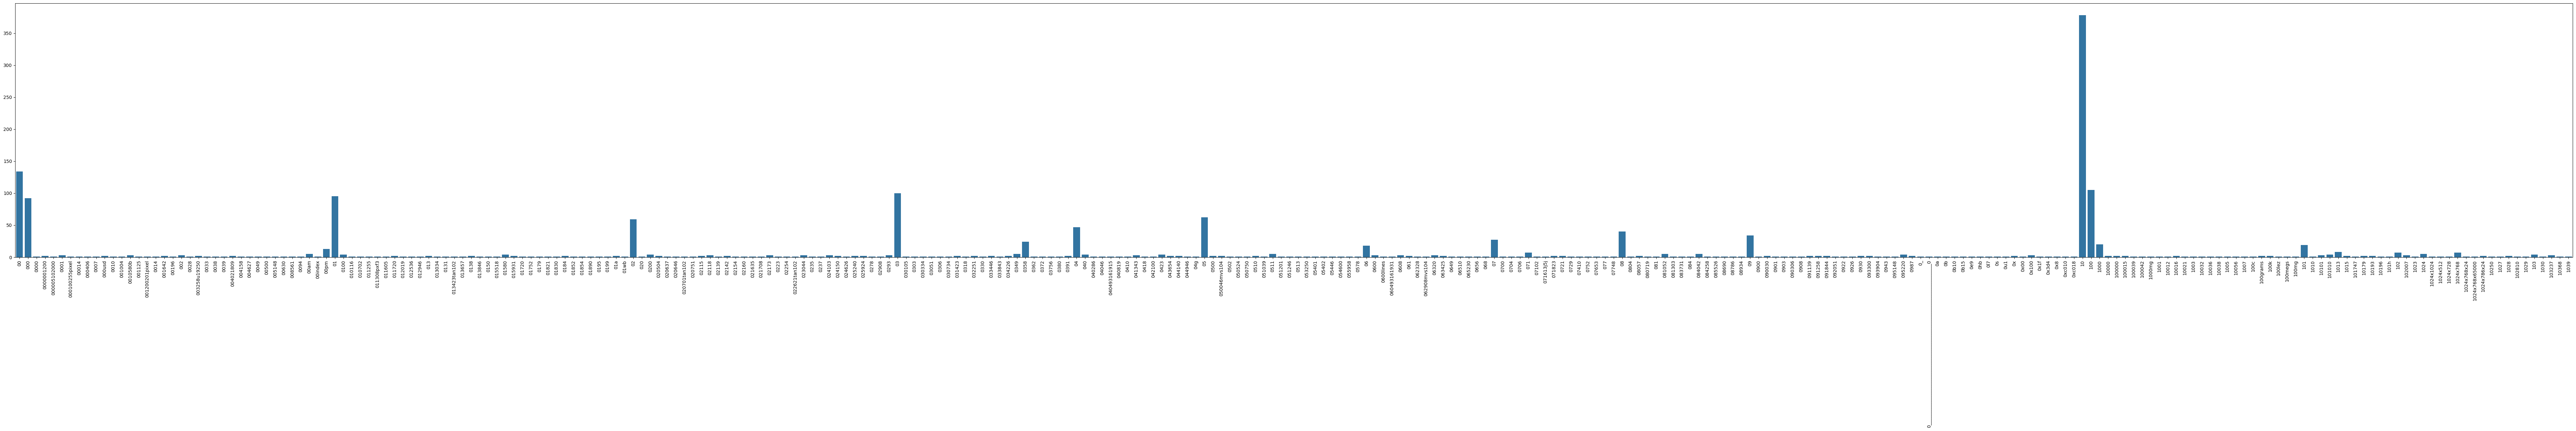

In [143]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [147]:
!pip install plotly.express

  Obtaining dependency information for plotly.express from https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for statsmodels>=0.9.0 from https://files.pythonhosted.org/packages/59/9a/e466a1b887a1441141e52dbcc98152f013d85076576da6eed2357f2016ae/statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ----- --------------------------------- 30.7/233.9 kB 640.0 kB/s eta 0:00:01
   ------------------------ --------------- 143.4/233.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**《Exercise 12》**

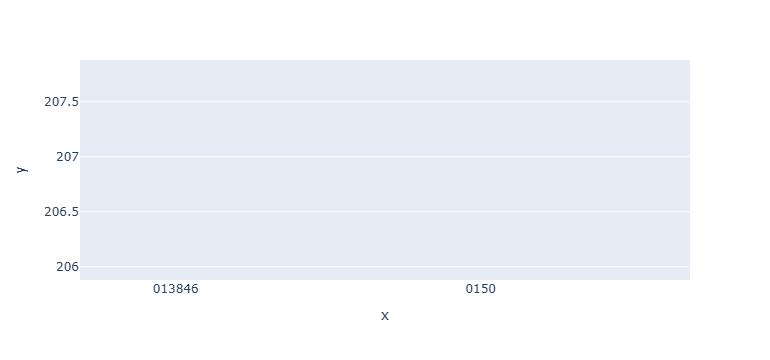

In [150]:
import plotly.express as px
px.bar(x=count_vect.get_feature_names_out()[:300],y=term_frequencies[:300])


**《Exercise 13》**

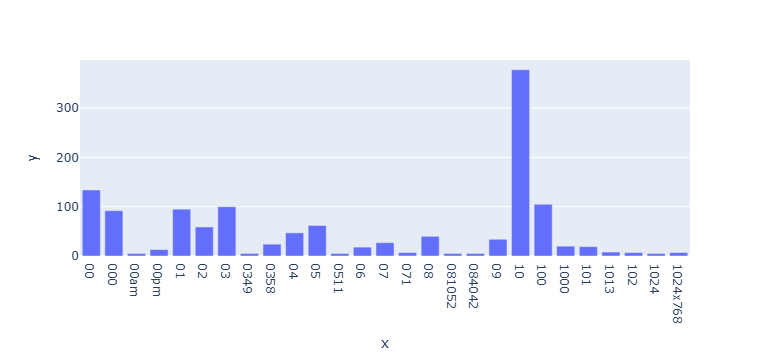

In [162]:
fre_ = pd.DataFrame({'term':count_vect.get_feature_names_out()[:300],'frequencies':term_frequencies[:300]})
new_fre_ = fre_[fre_['frequencies']>4]
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

**《Exercise 14》**

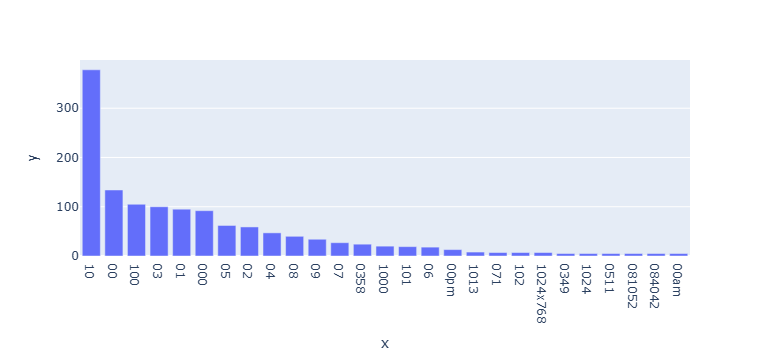

In [166]:
new_fre_=new_fre_.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\4082653373.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



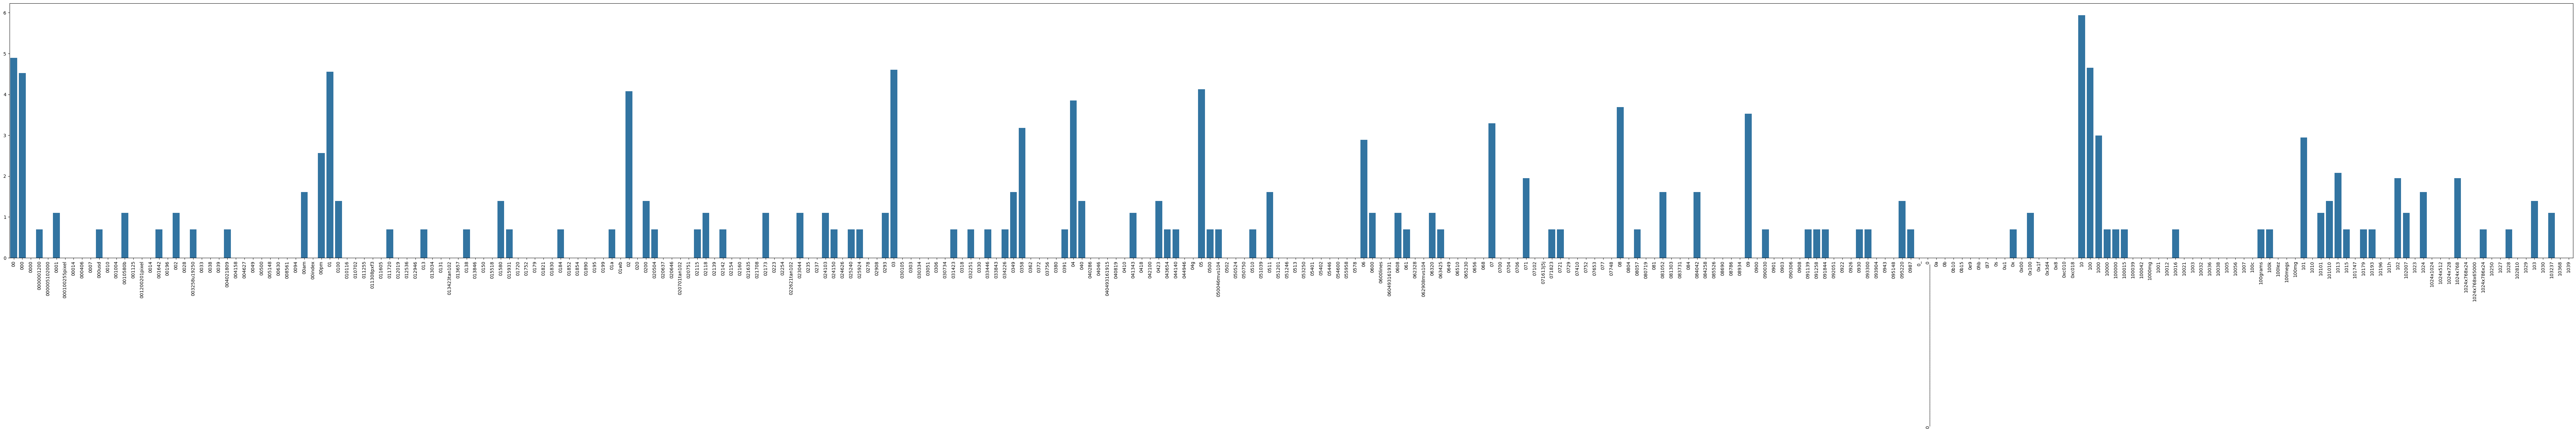

In [167]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

**《Exercise 15》**

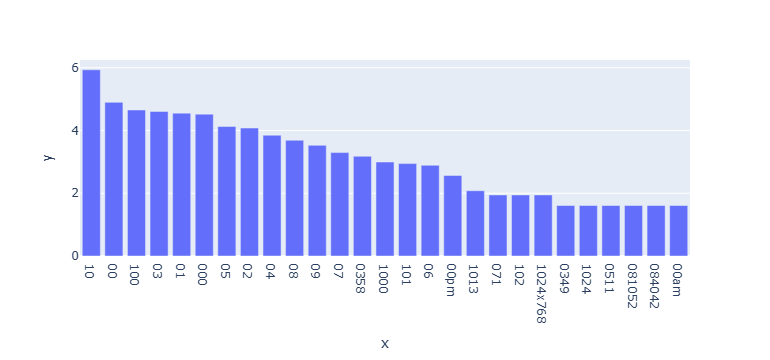

In [169]:
new_fre_['frequencies'] =[math.log(i) for i in new_fre_['frequencies']]
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

In [172]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#Create separate DataFrames for each category
categories = X['category_name'].unique() # Get unique category labels
category_dfs = {} # Dictionary to store DataFrames for each category
for category in categories:
# Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()
    
# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer() # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text']) # Transform the text data into word counts
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df
    
# Create term-document frequency DataFrames for each category
term_document_dfs = {} # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [175]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


00  000  000005102000  000100255pixel  0007  000usd  0010580b  \
0     0    0             0               0     0       0         0   
1     0    0             0               0     0       0         0   
2     0    0             0               0     0       0         0   
3     0    0             0               0     0       0         0   
4     0    0             0               0     0       0         0   
..   ..  ...           ...             ...   ...     ...       ...   
579   0    0             0               0     0       0         0   
580   0    0             0               0     0       0         0   
581   0    0             0               0     0       0         0   
582   0    0             0               0     0       0         0   
583   0    0             0               0     0       0         0   

     001200201pixel  00196  002  ...  zorn  zrz  zsoft  zt  zug  zurich  zvi  \
0                 0      0    0  ...     0    0      0   0    0       0    0   
1                 0      0    0  ...     0    0      0   0    0       0    0   
2                 0      0    0  ...     0    0      0   0    0       0    0   
3                 0      0    0  ...     0    0      0   0    0       0    0   
4                 0      0    0  ...     0    0      0   0    0       0    0   
..              ...    ...  ...  ...   ...  ...    ...  ..  ...     ...  ...   
579               0      0    0  ...     0    0      0   0    0       0    0   
580               0      0    0  ...     0    0      0   0    0       0    0   
581               0      0    0  ...     0    0      0   0    0       0    0   
582               0      0    0  ...     0    0      0   0    0       0    0   
583               0      0    0  ...     0    0      0   0    0       0    0   

     zyeh  zyxel  ªl  
0       0      0   0  
1       0      0   0  
2       0      0   0  
3       0      0   0  
4       0      0   0  
..    ...    ...  ..  
579     0      0   0  
580     0      0   0  
581     0      0   0  
582     0      0   0  
583     0      0   0  

[584 rows x 13756 columns]

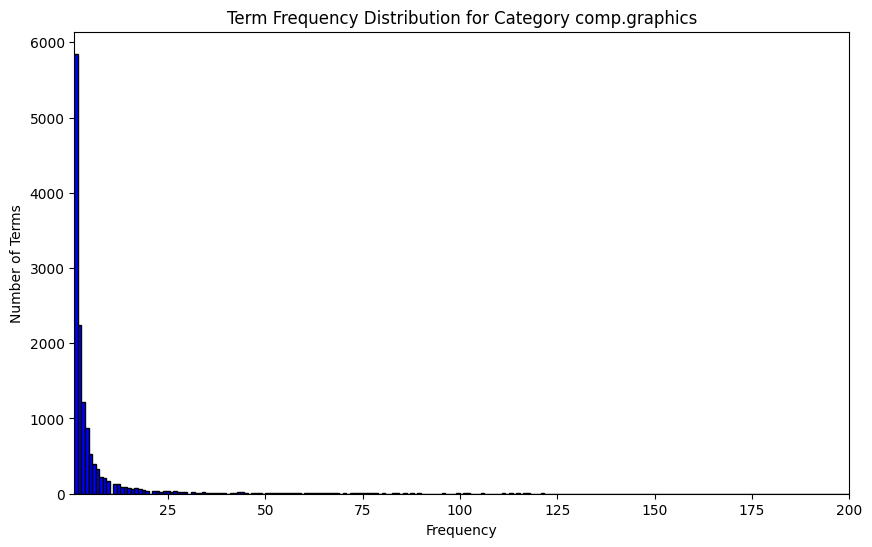

In [176]:
# Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [190]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts) # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1] # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in top 5%: 646
Filtered terms: ['empros', 'addresses', 'eerdman', 'address______________________________________________', 'address_________________________________________', 'col', 'colby', 'additives', 'additive', 'eekim', 'coleman', 'colin', 'addison', 'adding', 'colitis', 'addiction', 'coll', 'adder', 'addendum', 'collaborative', 'coined', 'adds', 'coincidental', 'adelphi', 'adjustment', 'adjusting', 'cognate', 'adjustable', 'adjust', 'cognitive', 'cognitively', 'cognitivists', 'adiposity', 'collapsed', 'adhesive', 'adherents', 'adherence', 'coherent', 'cohesion', 'coiera', 'adept', 'adeos', 'adenomas', 'elsa', 'adhering', 'add', 'adcs01', 'collapses', 'colonial', 'acuuracy', 'acute', 'color', 'colorado', 'acupuncturists', 'acupuncturist', 'colored', 'actuelles', 'colonel', 'actually', 'colorix', 'colormap', 'acts', 'colors', 'colorview', 'actor', 'colossians', 'colostate', 'colostomies', 'actuallay', 'eerp', 'ad', 'collosians', 'adc', 'aday'

In [184]:
category_number=3 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts) # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices] # Sort frequencies
# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)
# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]
# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: alt.atheism
Number of terms in bottom 1%: 112
Filtered terms: ['assessed', 'babble', 'baalke', 'b8', 'b711zbr', 'b6j', 'b64635', 'b17b', 'b12', 'b11', 'b1', 'babel', 'azulfadine', 'aziz', 'az', 'ayurveda', 'ayounes', 'axv', 'axis', 'axioms', 'axiom', 'axe', 'ax', 'aztec', 'aws', 'baboon', 'bachache', 'bacteriophage', 'bacterias', 'bacterial', 'bacteria', 'backwards', 'backups', 'backup', 'backs', 'backruptcy', 'backrest', 'baby', 'backpacked', 'backlog', 'backings', 'backing', 'backgrounds', 'background', 'backface', 'backed', 'backdraft', 'backbone', 'bacitracin', 'backon', 'badanes', 'awright', 'awfulness', 'availlable', 'availible', 'availble', 'avail', 'autoscaling', 'autopsies', 'autonomous', 'automaton', 'automation', 'automatically', 'avalon', 'automated', 'autographs', 'autocarto', 'autocad', 'auto', 'autimmune', 'authorship', 'authors', 'authorities', 'authored', 'authoratative', 'autolisp', 'awoke', 'ave', 'avenger', 'awfully', 'awful', 'awesome', 'awed', 'awdprime'

In [179]:
category_number=0 #You can change it from 0 to 3
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)
    
# Apply the filtering function to each category
filtered_term_document_dfs = {}
for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category comp.graphics:


000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

**《Exercise 16》**

In [ ]:
#Similarity:
#Common Words, The presence of common terms like "and," "or," and "the," which do not provide unique value to the analysis.
#Difference:
#alt.atheism category shows a blend of informal language and philosophical terms, reflecting personal experiences 
    #and broader discussions about belief, skepticism, and social interactions.
#Soc.religion.christian,Terms relate to theology, doctrine, scripture, and religious practices.
#Comp.graphics, Technical vocabulary related to computer graphics, programming, and design.
#In contrast, the sci.med category leans more towards technical and clinical language, with a focus on health and scientific discourse. 

In [241]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = DF2DB.DenseFormatDF(term_document_dfs[category])
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv','>=',1)


Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


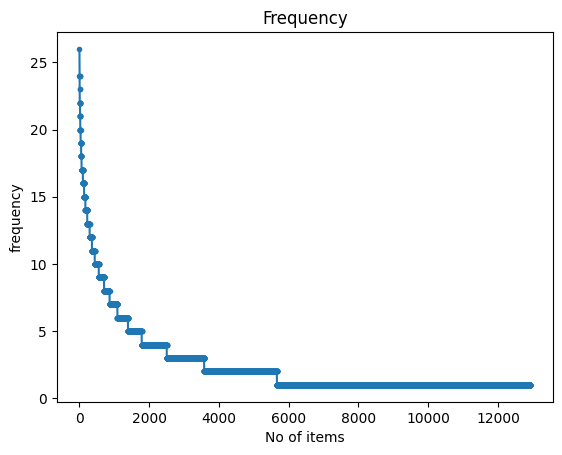

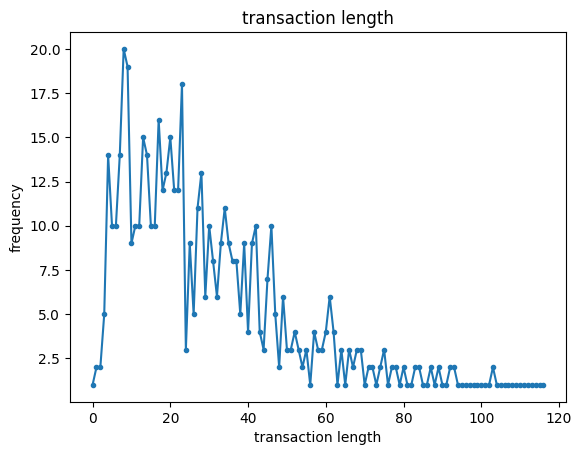

In [242]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


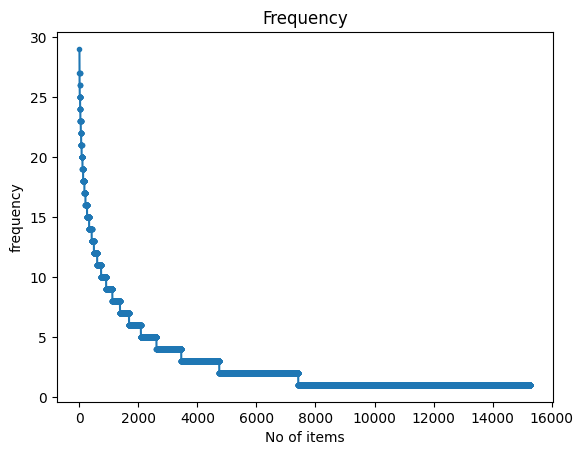

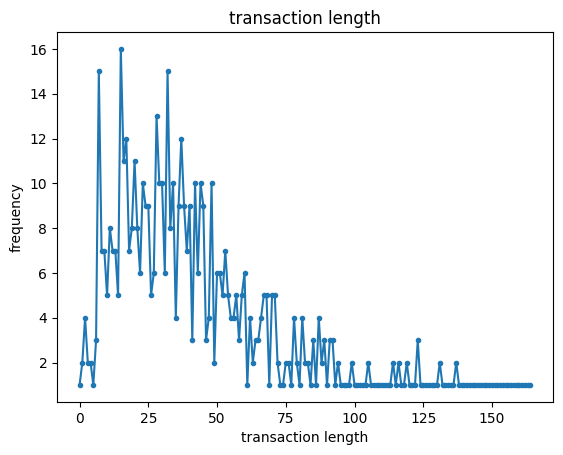

In [243]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


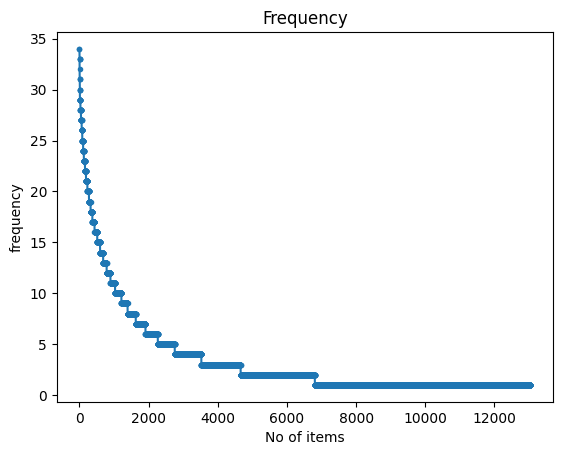

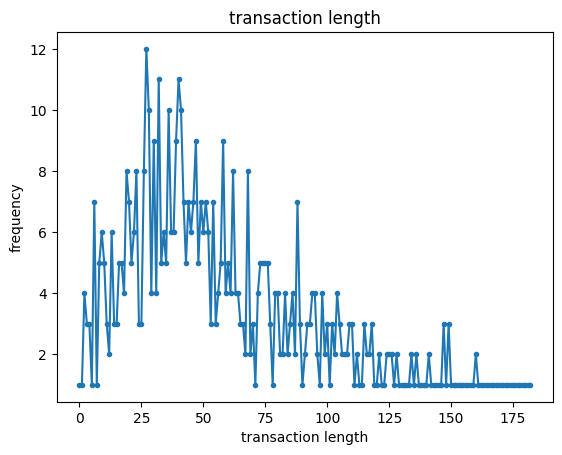

In [244]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


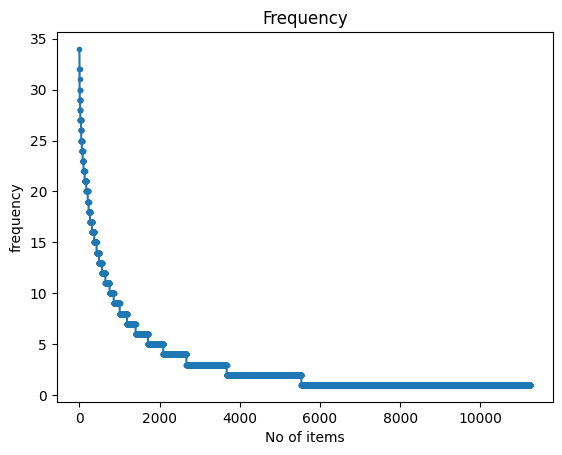

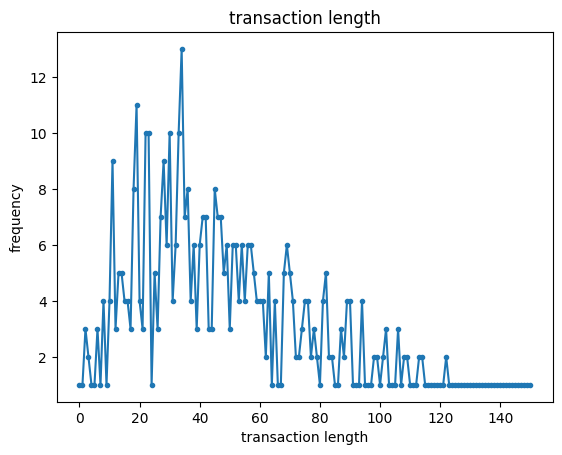

In [245]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [246]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.13670134544372559


In [247]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [248]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.12369561195373535


In [249]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [250]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.08377528190612793


In [251]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [252]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.14865422248840332


In [253]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [256]:
import pandas as pd
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]
# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)
# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)
# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [258]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text']) # X['text'] contains your text data
terms = count_vect.get_feature_names_out() # Original terms in the vocabulary
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)
# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split()) # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

**《Exercise 17》**

In [342]:
from PAMI.frequentPattern.topk import FAE as alg
K = 500
tp_obj_k500 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
tp_obj_k500.mine()
frequentPatternsDF_comp_graphics= tp_obj_k500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k500.getRuntime())) #measure the runtime

tp_obj_k500.save('freq_patterns_comp_graphics_topK_FAE_k500.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.8553731441497803


Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]

In [267]:
from PAMI.frequentPattern.topk import FAE as alg
K = 1000
tp_obj_k1000 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
tp_obj_k1000.mine()
frequentPatternsDF_comp_graphics= tp_obj_k1000.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k1000.getRuntime())) #measure the runtime

tp_obj_k1000.save('freq_patterns_comp_graphics_topK_FAE_k1000.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 2.9497969150543213


Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
995          favor proposed forum personally feel wate       12
996               proposed forum personally feel favor       12
997  convenience awful discussing posts curious con...       12
998  awful discussing posts curious concerning prop...       12
999  awful discussing posts curious concerning prop...       12

[1000 rows x 2 columns]

In [268]:
from PAMI.frequentPattern.topk import FAE as alg
K = 1500
tp_obj_k1500 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
tp_obj_k1500.mine()
frequentPatternsDF_comp_graphics= tp_obj_k1500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k1500.getRuntime())) #measure the runtime

tp_obj_k1500.save('freq_patterns_comp_graphics_topK_FAE_k1500.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 8.907448053359985


Patterns  Support
0                                                 maybe       26
1                                                  life       24
2                                                 ideas       24
3                                                  feel       24
4                                                 tried       24
...                                                 ...      ...
1495  awful discussing favor proposed learn personal...       12
1496  discussing favor proposed learn personally fee...       12
1497  convenience discussing favor proposed learn pe...       12
1498  discussing favor proposed learn personally fee...       12
1499  discussing favor proposed learn personally fee...       12

[1500 rows x 2 columns]

In [269]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 3
max_obj_N3 = alg.MaxFPGrowth('td_freq_db_comp_graphics.csv', N)
max_obj_N3.mine()
frequentPatternsDF_comp_graphics= max_obj_N3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N3.getRuntime())) #measure the runtime

max_obj_N3.save('freq_patterns_comp_graphics_maximal_N3.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 16.342759609222412


Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]

In [270]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 6
max_obj_N6 = alg.MaxFPGrowth('td_freq_db_comp_graphics.csv', N)
max_obj_N6.mine()
frequentPatternsDF_comp_graphics= max_obj_N6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N6.getRuntime())) #measure the runtime

max_obj_N6.save('freq_patterns_comp_graphics_maximal_N6.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.6515979766845703


Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa         6
4                               creative         6
...                                   ...      ...
1335                            feel apr         8
1336                                didn        22
1337                               wrong        23
1338                               tried        24
1339                               ideas        24

[1340 rows x 2 columns]

In [271]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 9
max_obj_N9 = alg.MaxFPGrowth('td_freq_db_comp_graphics.csv', N)
max_obj_N9.mine()
frequentPatternsDF_comp_graphics= max_obj_N9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N9.getRuntime())) #measure the runtime

max_obj_N9.save('freq_patterns_comp_graphics_maximal_N9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.1862773895263672


Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]

**《Exercise 17》=================================== Finish**

In [272]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [273]:
X_pca_tdm.shape

(2257, 2)

In [274]:
X_tsne_tdm.shape

(2257, 2)

In [275]:
X_umap_tdm.shape

(2257, 2)

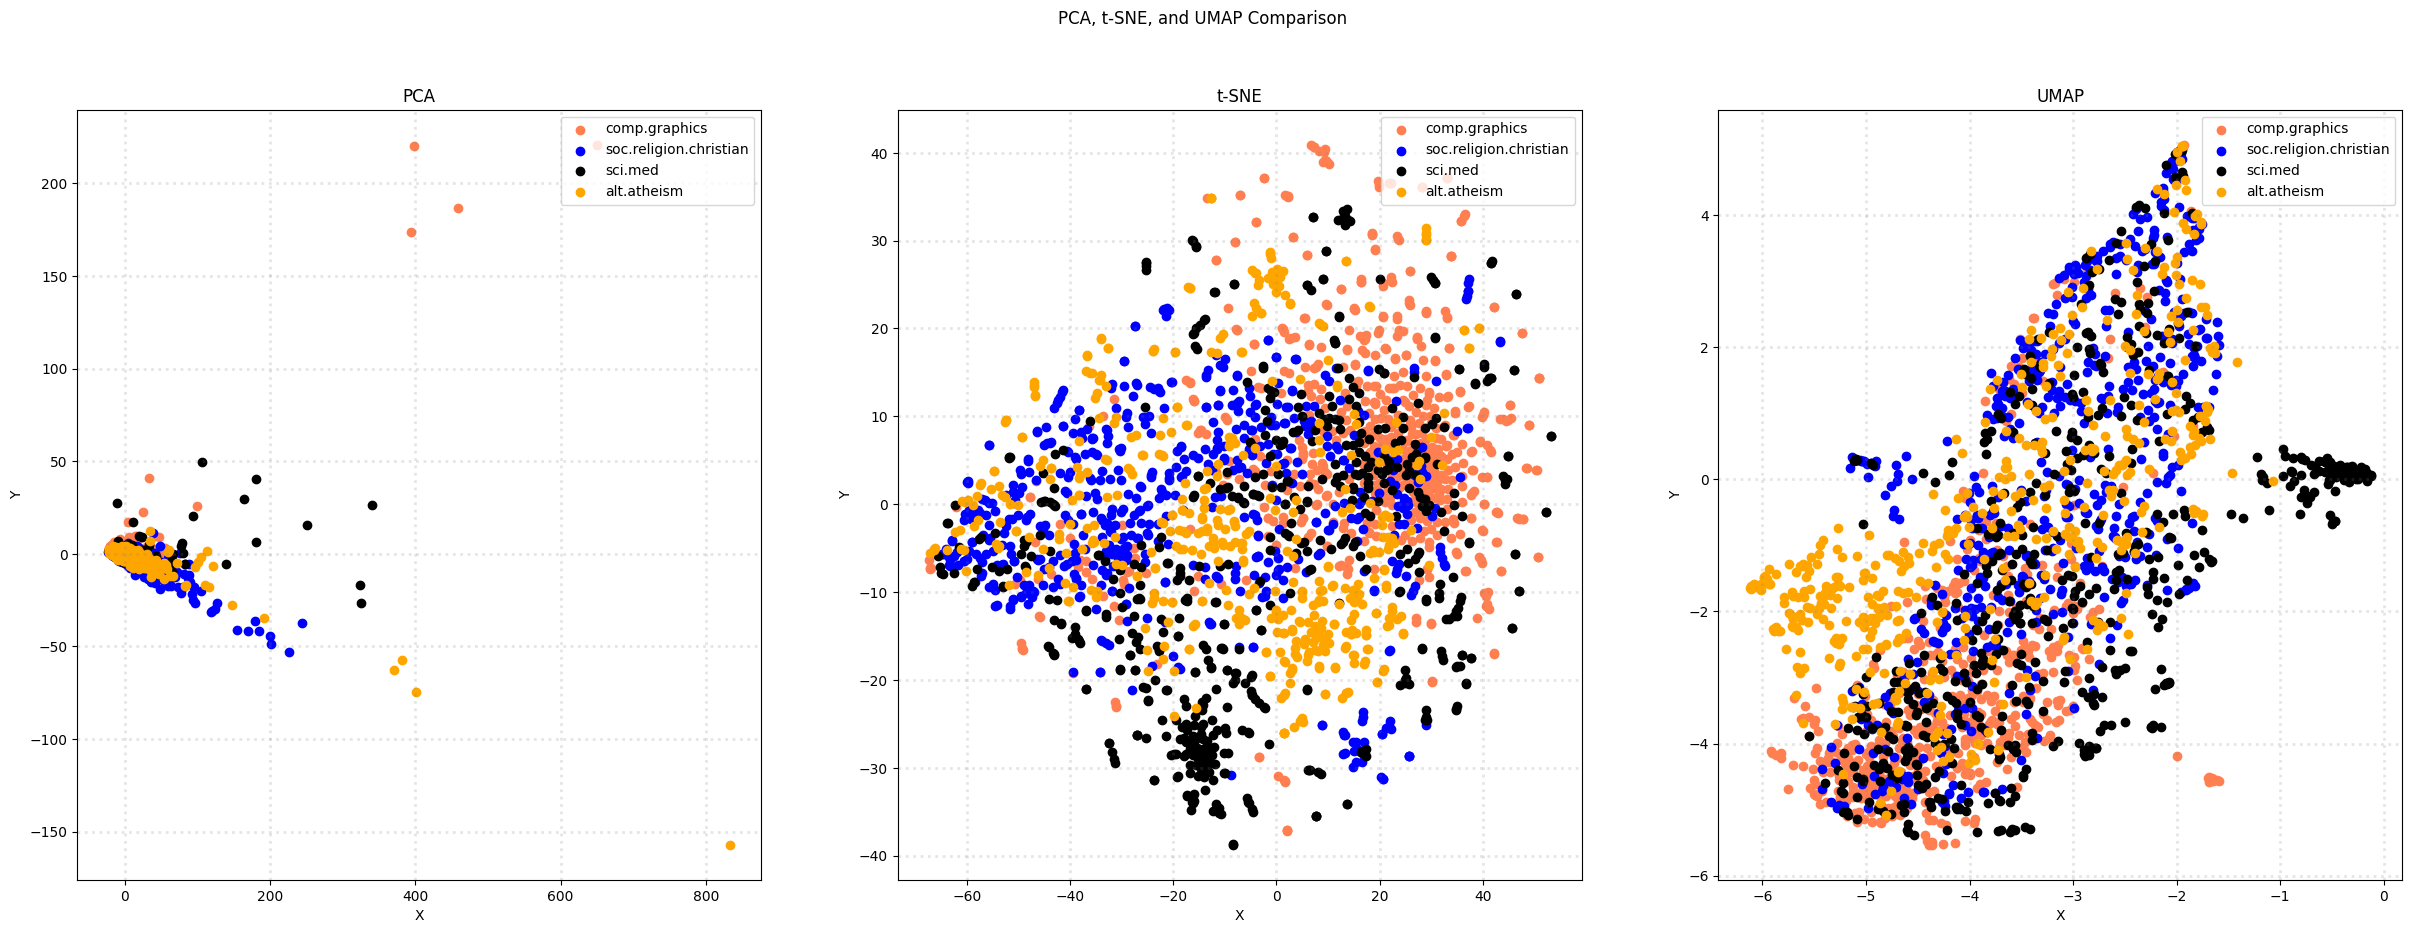

In [277]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()
fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='upper right')
        
# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')
plt.show()

In [278]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

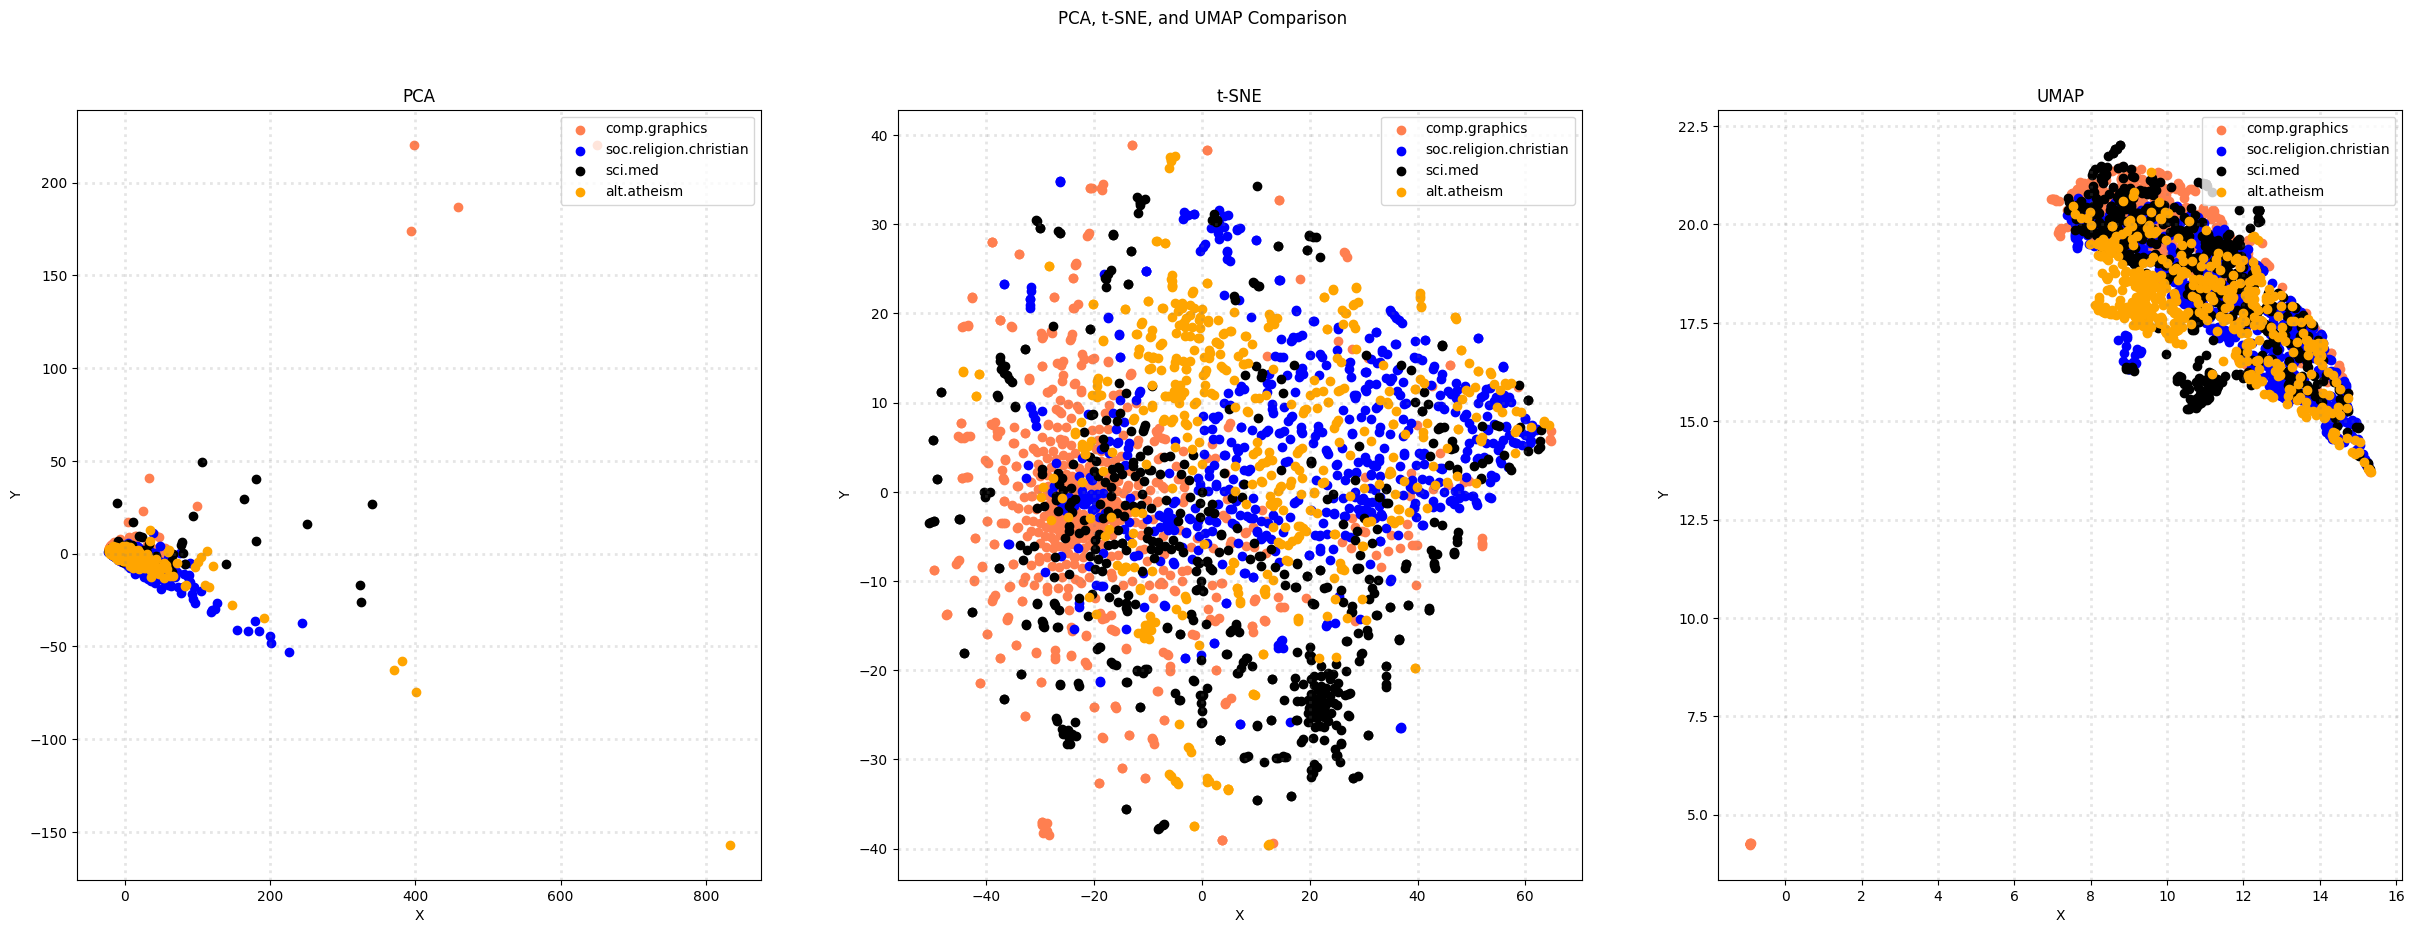

In [279]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()
fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='upper right')
        
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
plt.show()

**《Exercise 18》**

In [280]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

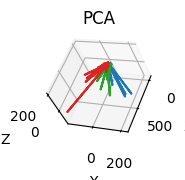

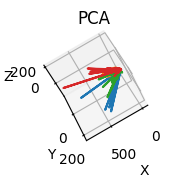

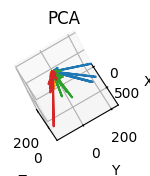

In [321]:
from mpl_toolkits.mplot3d import Axes3D


#ax = plt.axes(projection='3d')

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()
ax = plt.figure().add_subplot(3,2,1,projection='3d')

#fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA 3D')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, xe, ye, ze):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.plot(xs,ys,zs)
        #ax.contourf(sx,ys,zs,zdir='z',offset=-2)
        ax.view_init(elev=xe, azim=ye, roll=ze)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        #ax.legend(loc='upper right')
        
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(ax, X_pca_tdm, 'PCA', 45, 45 ,30)
ax = plt.figure().add_subplot(3,2,2,projection='3d')
plot_scatter(ax, X_pca_tdm, 'PCA',45, 90 ,30)
ax = plt.figure().add_subplot(3,2,3,projection='3d')
plot_scatter(ax, X_pca_tdm, 'PCA',45, 0 ,30)
plt.show()

In [322]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [323]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {Nntp-Posting-Host:, Thanks, PC, files., the, ...  [0, 1, 0, 0]  
1  {body, output, thiss, mesh, 28, the, along, Ma...  [0, 1, 0, 0]  
2  {women's, day,, car, judgemental, happen, for,...  [0, 0, 0, 1]  
3  {more, (M.M., writing, Organization:, after, b...  [0, 0, 0, 1]  
4  {provided., article, on., sins,, many, the, so...  [0, 0, 0, 1]  
5  {trying, article, 28, could, the, (Virgilio, b...  [0, 0, 0, 1]  
6  {article, many, >flesh., >I, Timothy, news@cbn...  [0, 0, 0, 1]  
7  {probably, grease, for, >enough,, limp, I've, ...  [0, 0, 1, 0]  
8  {3, common, article, chastity, the, intellect,...  [0, 0, 1, 0]

**《Exercise 19》**

In [327]:
mlb_name = preprocessing.LabelBinarizer()

mlb_name.fit(X.category_name)
mlb_name.transform(X['category_name']).tolist()

[[0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1,

In [329]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)
document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)
document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [330]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [331]:
from sklearn.preprocessing import binarize
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)
# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)
# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [332]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\3451280700.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\3451280700.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\3451280700.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_36876\3451280700.py:13: DeprecationWarning:

Conversion of an array with ndim >

In [333]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)
# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [334]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
634        0     0  ...    0       0      0     0       0      0   0    0   0   
322        0     0  ...    0       0      0     0       0      0   0    0   0   
1725       0     0  ...    0       0      0     0       0      0   0    0   0   
266        0     0  ...    0       0      0     0       0      0   0    0   0   
1138       0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1638       0     0  ...    0       0      0     0       0      0   0    0   0   
1095       0     0  ...    0       0      0     0       0      0   0    0   0   
1130       0     0  ...    0       0      0     0       0      0   0    0   0   
1294       0     0  ...    0       0      0     0       0      0   0    0   0   
860        0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
634          0  
322          0  
1725         0  
266          0  
1138         0  
...        ...  
1638         0  
1095         0  
1130         0  
1294         0  
860          0  

[1579 rows x 35788 columns]

In [335]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
561        0     0  ...    0       0      0     0       0      0   0    0   0   
440        0     0  ...    0       0      0     0       0      0   0    0   0   
1513       0     0  ...    0       0      0     0       0      0   0    0   0   
1360       0     0  ...    0       0      0     0       0      0   0    0   0   
259        0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1552       0     0  ...    0       0      0     0       0      0   0    0   0   
331        0     0  ...    0       0      0     0       0      0   0    0   0   
194        0     0  ...    0       0      0     0       0      0   0    0   0   
2122       0     0  ...    0       0      0     0       0      0   0    0   0   
2147       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
561          0  
440          0  
1513         0  
1360         0  
259          0  
...        ...  
1552         0  
331          0  
194          0  
2122         0  
2147         0  

[678 rows x 35788 columns]

In [336]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



In [337]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)
# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [338]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
634        0     0  ...                                   0   
322        0     0  ...                                   0   
1725       0     0  ...                                   0   
266        0     0  ...                                   0   
1138       0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1638       0     0  ...                                   0   
1095       0     0  ...                                   0   
1130       0     0  ...                                   0   
1294       0     0  ...                                   0   
860        0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
634                                  0                       0   
322                                  0                       0   
1725                                 0                       0   
266                                  0                       0   
1138                                 0                       0   
...                                ...                     ...   
1638                                 0                       0   
1095                                 0                       0   
1130                                 0                       0   
1294                                 0                       0   
860                                  0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
634                                 0                                0   
322                                 0                                0   
1725                                0                                0   
266                                 0                                0   
1138                                0                                0   
...                               ...                              ...   
1638                                0                                0   
1095                                0                                0   
1130                                0                                0   
1294                                0                                0   
860                                 0                                0   

      axes funds motss matching  boy funds motss matching  \
634                           0                         0   
322                           0                         0   
1725                          0                         0   
266                           0                         0   
1138                          0                         0   
...                         ...                       ...   
1638                          0                         0   
1095                          0                         0   
1130                          0                         0   
1294                

In [339]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
561        0     0  ...                                   0   
440        0     0  ...                                   0   
1513       0     0  ...                                   0   
1360       0     0  ...                                   0   
259        0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1552       0     0  ...                                   0   
331        0     0  ...                                   0   
194        0     0  ...                                   0   
2122       0     0  ...                                   0   
2147       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
561                                  0                       0   
440                                  0                       0   
1513                                 0                       0   
1360                                 0                       0   
259                                  0                       0   
...                                ...                     ...   
1552                                 0                       0   
331                                  0                       0   
194                                  0                       0   
2122                                 0                       0   
2147                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
561                                 0                                0   
440                                 0                                0   
1513                                0                                0   
1360                                0                                0   
259                                 0                                0   
...                               ...                              ...   
1552                                0                                0   
331                                 0                                0   
194                                 0                                0   
2122                                0                                0   
2147                                0                                0   

      axes funds motss matching  boy funds motss matching  \
561                           0                         0   
440                           0                         0   
1513                          0                         0   
1360                          0                         0   
259                           0                         0   
...                         ...                       ...   
1552                          0                         0   
331                           0                         0   
194                           0                         0   
2122                

In [340]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678

